Set $\omega_X = \omega_Y = \omega_Z = 1$ and solve the equation of motion for $x, y, z$ numerically using any solver you have available. You basically need to exponentiate the matrix $\hat{M}$. Demonstrate that the solution is a rotation of the initial $(x, y, z)$-vector around the vector oriented along $(1, 1, 1)$.

In [7]:
import numpy as np
import qutip
import scipy

In [2]:
def bloch_vector_to_statevector(bloch_vector):
    # Unpack the Bloch vector
    x, y, z = bloch_vector
    
    # Calculate the norm of the Bloch vector
    r = np.sqrt(x**2 + y**2 + z**2)
    
    # Normalize the vector (if r is zero, return the ground state |0⟩)
    if r == 0:
        return qutip.basis(2, 0)  # The |0⟩ state
    
    # Normalize the Bloch vector
    x_norm = x / r
    y_norm = y / r
    z_norm = z / r

    # Calculate theta and phi
    theta = np.arccos(z_norm)  # Angle from z-axis
    phi = np.arctan2(y_norm, x_norm)  # Angle in x-y plane

    # Convert to the quantum state |ψ⟩
    statevector = (np.cos(theta / 2) * qutip.basis(2, 0) + 
                   np.exp(1j * phi) * np.sin(theta / 2) * qutip.basis(2, 1))
    
    return statevector

In [3]:
# Define constants
omega_X = 1.0
omega_Y = 1.0
omega_Z = 1.0

# Define the matrix M
M = np.array([[0, -omega_Z, omega_Y],
              [omega_Z, 0, -omega_X],
              [-omega_Y, omega_X, 0]])

# Define time parameters
tlist = np.linspace(0, 10, 50)  # Time array
initial_vector = np.array([1, 0, 0])  # Initial state vector (along x-axis)

# Prepare to store results
trajectory = np.zeros((len(tlist), 3))

# Calculate the trajectory using matrix exponentiation
for i, t in enumerate(tlist):
    # Calculate the matrix exponential
    exp_M_t = scipy.linalg.expm(M * t)
    # Calculate the new state vector
    trajectory[i] = exp_M_t @ initial_vector

# Extract x, y, and z components
x_values = trajectory[:, 0]
y_values = trajectory[:, 1]
z_values = trajectory[:, 2]

In [4]:
svs = [bloch_vector_to_statevector([i[0], i[1], i[2]]) for i in trajectory]

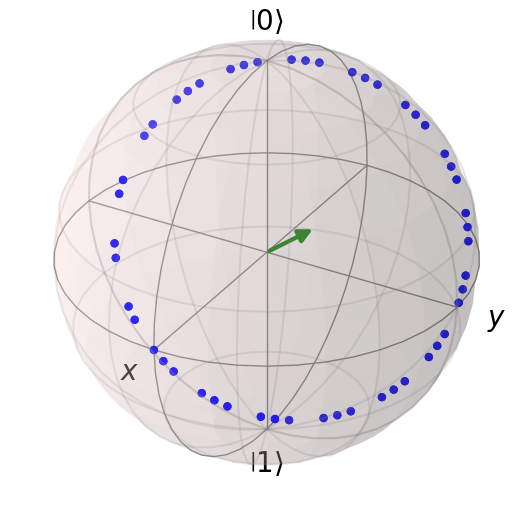

In [5]:
b = qutip.Bloch()
b.point_color = "blue"
b.point_marker = ["o"]
b.point_size = [25]
b.add_states(bloch_vector_to_statevector([1, 1, 1]))
b.add_states(svs, "point")
b.show()

We can check that all the vectors have same angle with the vector $(1, 1, 1)$

In [6]:
axis_vec = np.array([1., 1, 1])
axis_vec /= np.linalg.norm(axis_vec)

vec = trajectory[0]
angle = np.arccos(np.dot(axis_vec, vec))

print('angle:', angle)

for vec in trajectory[1:]:
    assert np.allclose(np.arccos(np.dot(axis_vec, vec)), angle) == True

angle: 0.9553166181245091


The animated bloch sphere is can be found [here](https://github.com/Gopal-Dahale/qmnp/tree/main/hw1/p2#exercise-15). The solution is a rotation of the initial $(x, y, z)$-vector around the vector oriented along $(1, 1, 1)$.

<div align="center">
<img width="400" src="ex_15.gif" /><br>
</div>